 **Cardiovascular Study Dataset**

 The analisis of the prediction whether patient have 10 year risk of coronary heart disease CHD with the creating data visualizations.

 Content:

 1. EDA
 2. Modeling

**1. EDA**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("train.csv.xls")
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Initial inspection
print("Data size:", df.shape)
print("\nData information:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Data size: (3390, 17)

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       33

In [ ]:
df_clean = df.drop(['id','education'], axis=1)
print("Missing values ​​by columns:")
missing_data = df_clean.isnull().sum()
print(missing_data[missing_data > 0])

Missing values ​​by columns:
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64


The analysis shows that the database contains many missing values. These missing values ​​should be handled using median imputation for numeric variables and frequency imputation for categorical variables. This will eliminate the problem of missing values ​​for logistic regression. In addition, we will not have to remove values, which will save the sample size.

In [ ]:
# Filling missing values ​​with median for numeric variables
numeric_cols = ['cigsPerDay', 'totChol', 'BMI','heartRate', 'glucose']
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

In [ ]:
# # Filling missing values ​​with median for categorical variables
categorical_cols = ['BPMeds']
for col in categorical_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

In [ ]:
# The second inspection after the imputation
print("Data size:", df_clean.shape)
print("\nData information:")
print(df_clean.info())
print("\nMissing values:")
print(df_clean.isnull().sum())

Data size: (3390, 15)

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB
None



The re-analysis indicated that following the imputation procedure, there are no missing values.

It is also necessary to transform some categorical variables for further processing.

In [ ]:
# The formating the data of categorical variables
df_clean['BPMeds'] = df_clean['BPMeds'].astype(int)
df_clean['sex'] = df_clean['sex'].replace({'F': 0, 'M': 1})
df_clean['is_smoking'] = df_clean['is_smoking'].replace({'NO': 0, 'YES': 1})

Visualisation of the target variable as a cross of medical factors.

In [ ]:
target_col = 'TenYearCHD'

print(f"Risk distribution: {df_clean[target_col].value_counts()}")

Risk distribution: TenYearCHD
0    2879
1     511
Name: count, dtype: int64


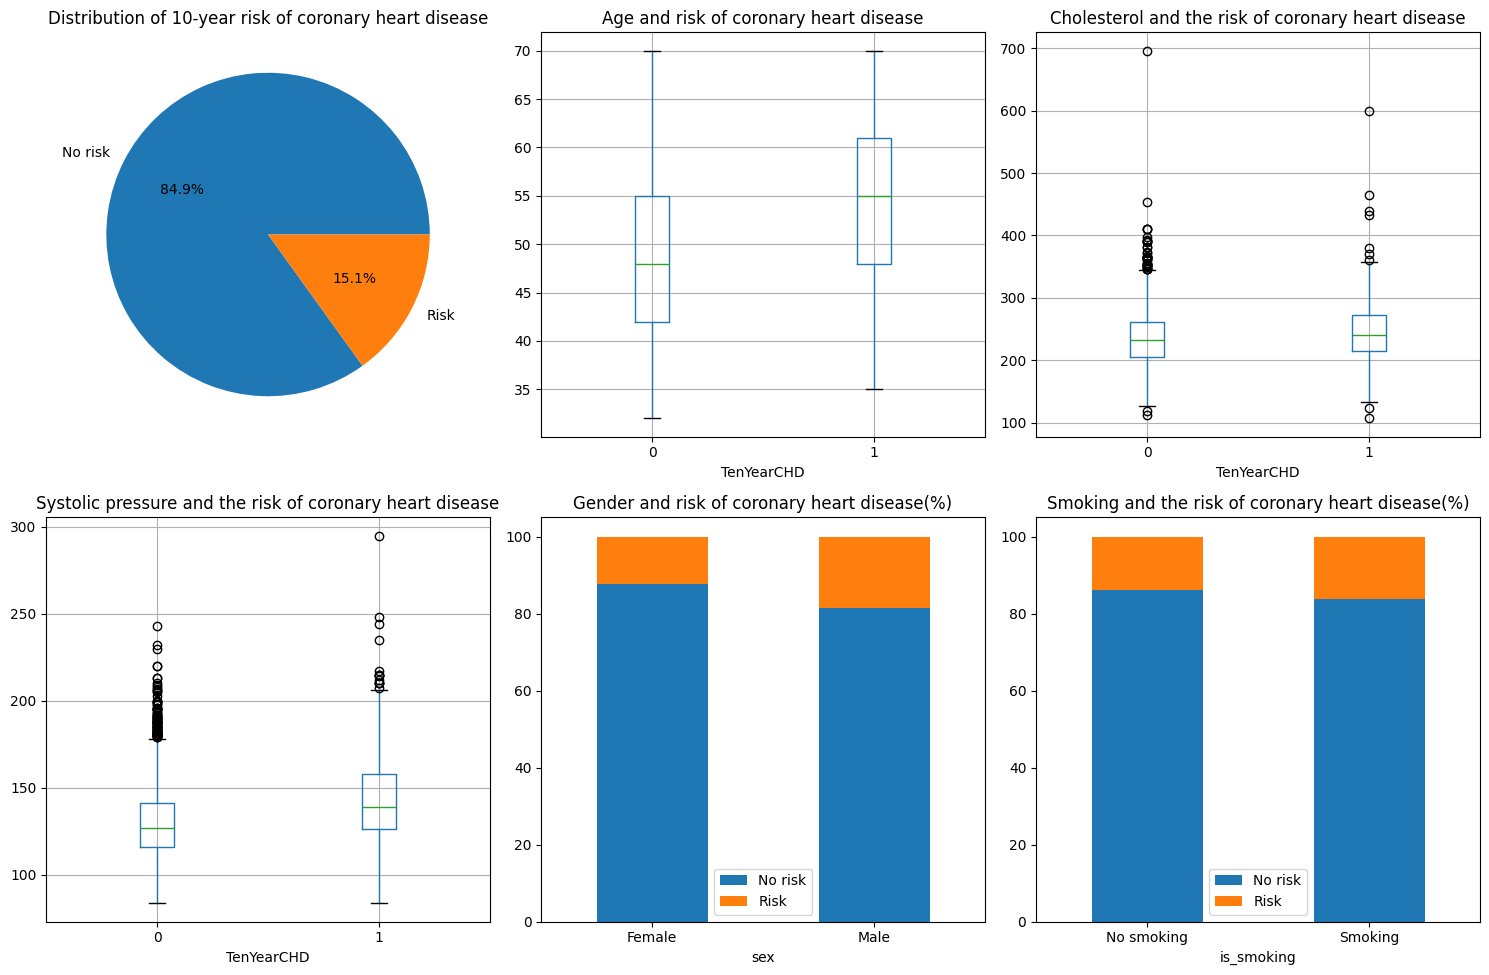

In [ ]:
# Distribution of target variable
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
target_dist = df_clean[target_col].value_counts()
plt.pie(target_dist.values, labels=['No risk', 'Risk'], autopct='%1.1f%%')
plt.title('Distribution of 10-year risk of coronary heart disease')

# Age by risk groups
plt.subplot(2, 3, 2)
df_clean.boxplot(column='age', by=target_col, ax=plt.gca())
plt.title('Age and risk of coronary heart disease')
plt.suptitle('')

# Cholesterol by risk groups
plt.subplot(2, 3, 3)
df_clean.boxplot(column='totChol', by=target_col, ax=plt.gca())
plt.title('Cholesterol and the risk of coronary heart disease')
plt.suptitle('')

# Systolic pressure by risk groups
plt.subplot(2, 3, 4)
df_clean.boxplot(column='sysBP', by=target_col, ax=plt.gca())
plt.title('Systolic pressure and the risk of coronary heart disease')
plt.suptitle('')

# Gender abd risk of coronary heart disease
plt.subplot(2, 3, 5)
sex_chd = pd.crosstab(df_clean['sex'], df_clean[target_col], normalize='index') * 100
sex_chd.plot(kind='bar', ax=plt.gca(), stacked=True)
plt.title('Gender and risk of coronary heart disease(%)')
plt.legend(["No risk","Risk"])
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)

# Smoking and the risk of coronary heart disease
plt.subplot(2, 3, 6)
smoke_chd = pd.crosstab(df_clean['is_smoking'], df_clean[target_col], normalize='index') * 100
smoke_chd.plot(kind='bar', ax=plt.gca(), stacked=True)
plt.title('Smoking and the risk of coronary heart disease(%)')
plt.legend(['No risk', 'Risk'])
plt.xticks([0, 1], ['No smoking', 'Smoking'], rotation=0)

plt.tight_layout()
plt.show()


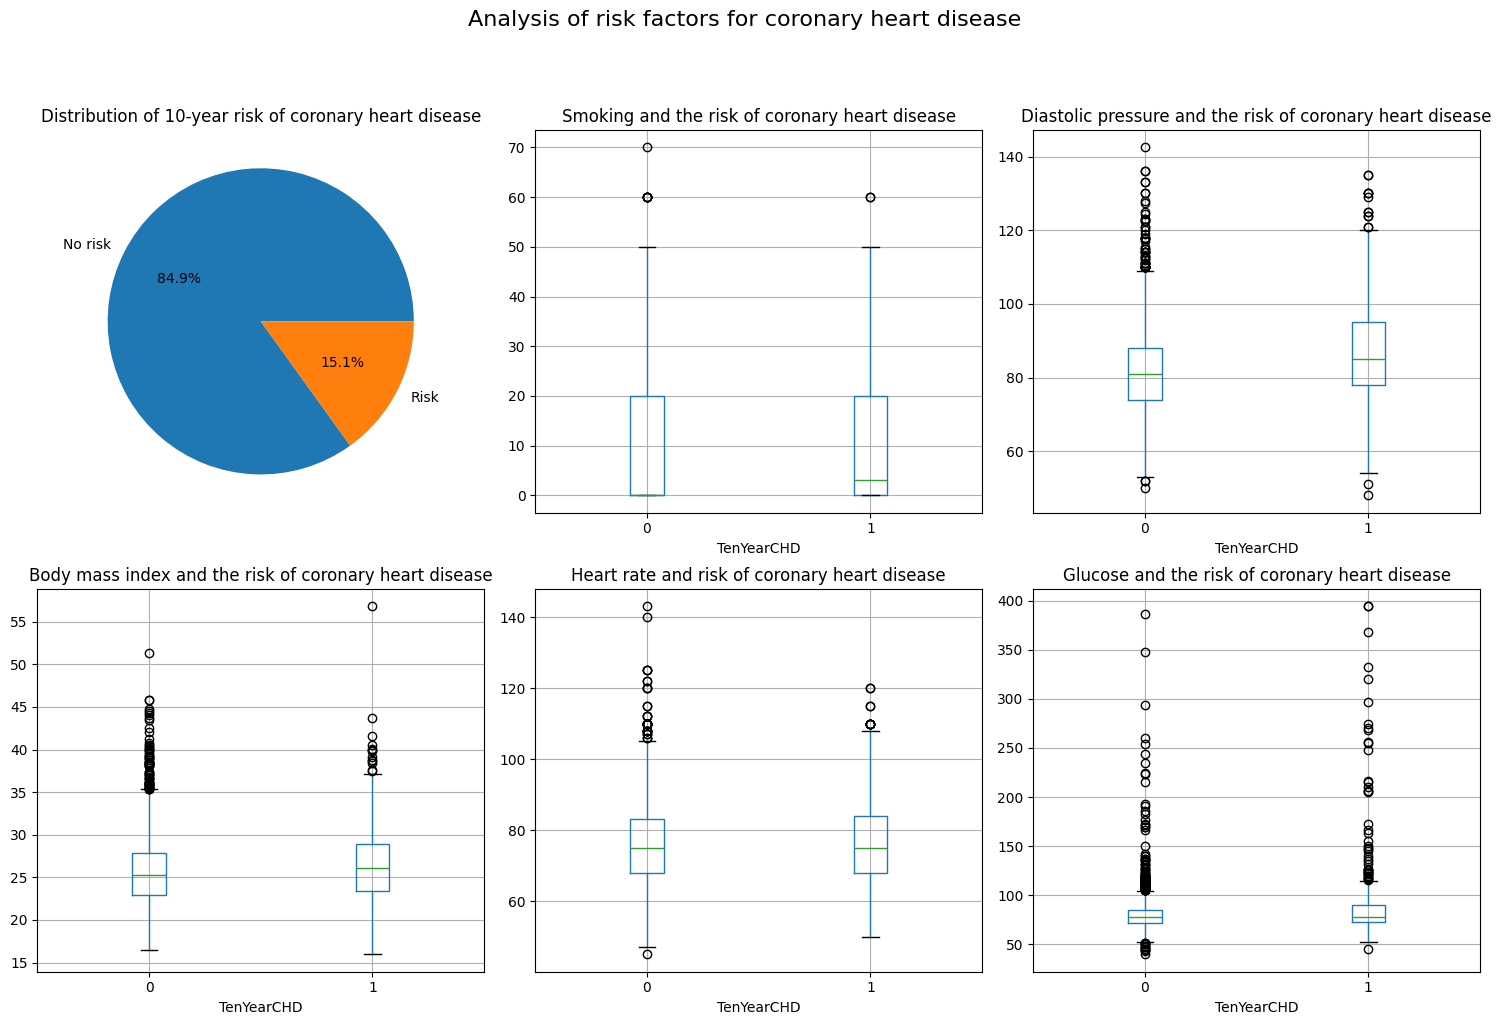

In [ ]:
# Distribution of target variable
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
target_dist = df_clean[target_col].value_counts()
plt.pie(target_dist.values, labels=['No risk', 'Risk'], autopct='%1.1f%%')
plt.title('Distribution of 10-year risk of coronary heart disease')

# Smoking by risk groups
plt.subplot(2, 3, 2)
df_clean.boxplot(column='cigsPerDay', by=target_col, ax=plt.gca())
plt.title('Smoking and the risk of coronary heart disease')
plt.suptitle('')

# Diastolic pressure by risk groups
plt.subplot(2, 3, 3)
df_clean.boxplot(column='diaBP', by=target_col, ax=plt.gca())
plt.title('Diastolic pressure and the risk of coronary heart disease')
plt.suptitle('')

# Body mass index by risk groups
plt.subplot(2, 3, 4)
df_clean.boxplot(column='BMI', by=target_col, ax=plt.gca())
plt.title('Body mass index and the risk of coronary heart disease')
plt.suptitle('')

# Heart rate by risk groups
plt.subplot(2, 3, 5)
df_clean.boxplot(column='heartRate', by=target_col, ax=plt.gca())
plt.title('Heart rate and risk of coronary heart disease')
plt.suptitle('')

# Glucose by risk groups
plt.subplot(2, 3, 6)
df_clean.boxplot(column='glucose', by=target_col, ax=plt.gca())
plt.title('Glucose and the risk of coronary heart disease')
plt.suptitle('')

# Reformatting using tight_layout to eliminate overlaps
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Increase the top edge to accommodate the suvers
plt.suptitle('Analysis of risk factors for coronary heart disease', fontsize=16, y=1.02)

plt.show()

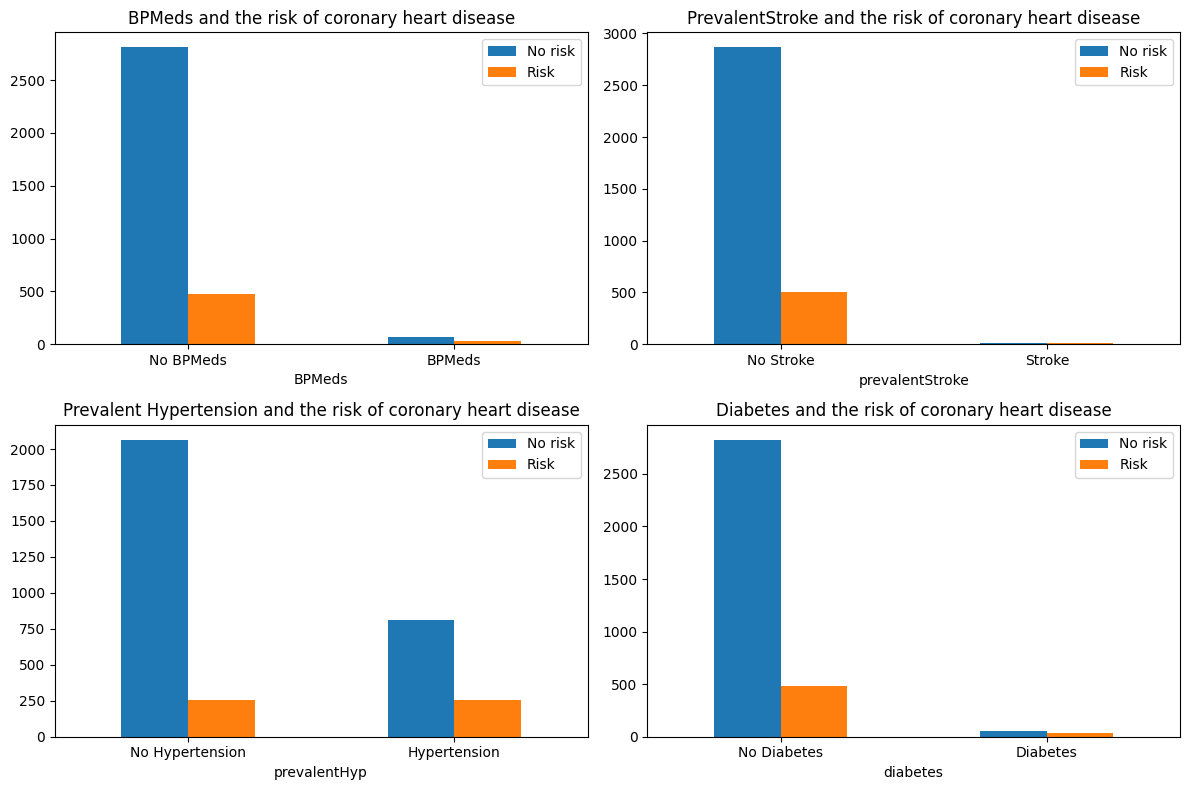

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(12, 8))

# BPMeds by risk groups
plt.subplot(2, 2, 1)
crosstab_bpm = pd.crosstab(df_clean['BPMeds'], df_clean['TenYearCHD'])
crosstab_bpm.plot(kind='bar', ax=plt.gca())
plt.title('BPMeds and the risk of coronary heart disease')
plt.legend(['No risk', 'Risk'])
plt.xticks([0, 1], ['No BPMeds', 'BPMeds'], rotation=0)


# PrevalentStroke and risk of coronary heart disease
plt.subplot(2, 2, 2)
crosstab_stroke = pd.crosstab(df_clean['prevalentStroke'], df_clean['TenYearCHD'])
crosstab_stroke.plot(kind='bar', ax=plt.gca())
plt.title('PrevalentStroke and the risk of coronary heart disease')
plt.legend(['No risk', 'Risk'])
plt.xticks([0, 1], ['No Stroke', 'Stroke'], rotation=0)

# Prevalent Hypertension and the risk of coronary heart disease
plt.subplot(2, 2, 3)
crosstab_hyp = pd.crosstab(df_clean['prevalentHyp'], df_clean['TenYearCHD'])
crosstab_hyp.plot(kind='bar', ax=plt.gca())
plt.title('Prevalent Hypertension and the risk of coronary heart disease')
plt.legend(['No risk', 'Risk'])
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'], rotation=0)

# Diabetes and the risk of coronary heart disease
plt.subplot(2, 2, 4)
crosstab_diabetes = pd.crosstab(df_clean['diabetes'], df_clean['TenYearCHD'])
crosstab_diabetes.plot(kind='bar', ax=plt.gca())
plt.title('Diabetes and the risk of coronary heart disease')
plt.legend(['No risk', 'Risk'])
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)


plt.tight_layout()
plt.show()

Based on these graphs, we can make a preliminary conclusion that these variables are quite problematic. It is worth analysing the variables. The variables about diabetes and stroke in the anamnesis have critically small numbers of observations.

In [ ]:
# BPMeds и TenYearCHD
crosstab_bpm = pd.crosstab(df_clean['BPMeds'], df_clean['TenYearCHD'], margins=True, dropna=False)
print("BPMeds и TenYearCHD\n", crosstab_bpm)

# Diabetes и TenYearCHD
crosstab_diabetes = pd.crosstab(df_clean['diabetes'], df_clean['TenYearCHD'], margins=True, dropna=False)
print("\nDiabetes и TenYearCHD\n", crosstab_diabetes)

# PrevalentHyp и TenYearCHD
crosstab_hyp = pd.crosstab(df_clean['prevalentHyp'], df_clean['TenYearCHD'], margins=True, dropna=False)
print("\nPrevalentHyp и TenYearCHD\n", crosstab_hyp)

# PrevalentStroke и TenYearCHD
crosstab_stroke = pd.crosstab(df_clean['prevalentStroke'], df_clean['TenYearCHD'], margins=True, dropna=False)
print("\nPrevalentStroke и TenYearCHD\n", crosstab_stroke)

BPMeds и TenYearCHD
 TenYearCHD     0    1   All
BPMeds                     
0           2812  478  3290
1             67   33   100
All         2879  511  3390

Diabetes и TenYearCHD
 TenYearCHD     0    1   All
diabetes                   
0           2825  478  3303
1             54   33    87
All         2879  511  3390

PrevalentHyp и TenYearCHD
 TenYearCHD       0    1   All
prevalentHyp                 
0             2065  256  2321
1              814  255  1069
All           2879  511  3390

PrevalentStroke и TenYearCHD
 TenYearCHD          0    1   All
prevalentStroke                 
0                2867  501  3368
1                  12   10    22
All              2879  511  3390


Cross-tabular tables indicate that categorical variables are unbalanced and present an unrealistic picture for construction. The exception is the hypertension variable.

Analysis of outliers.

<Axes: >

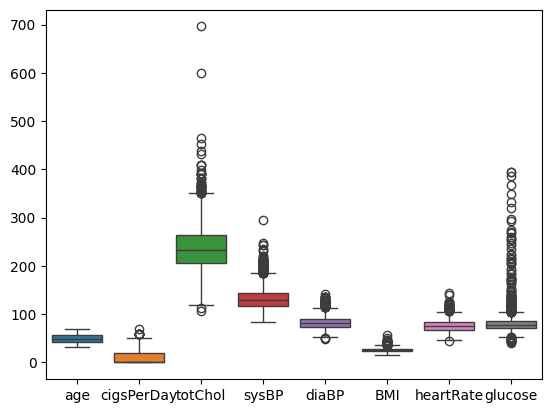

In [ ]:
sns.boxplot(data=df_clean.loc[:, ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

<Axes: >

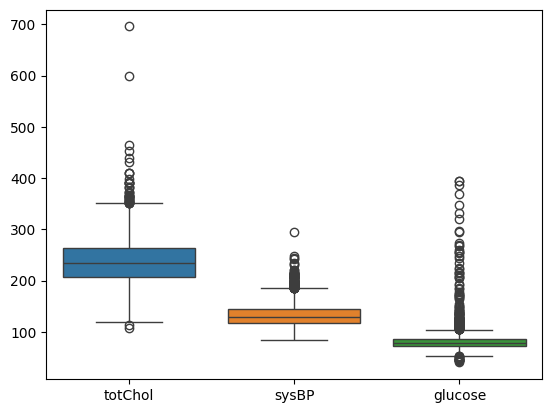

In [ ]:
sns.boxplot(data=df_clean.loc[:, ['totChol', 'sysBP', 'glucose']])

<Axes: >

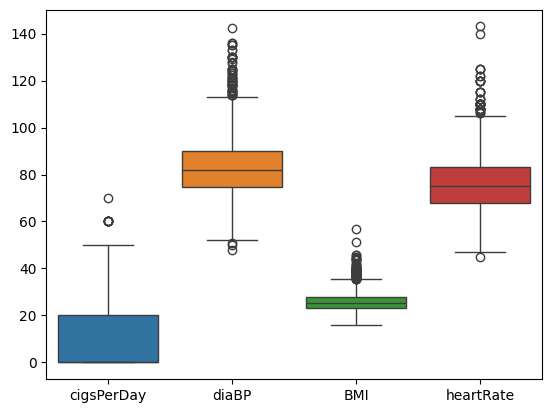

In [ ]:
sns.boxplot(data=df_clean.loc[:, ['cigsPerDay', 'diaBP', 'BMI', 'heartRate']])

Boxplots show a large number of outliers. This can significantly distort the results. It was decided to analyse the number of z-values ​​exceeding 3.0, which will give a more objective picture of the number of outliers.

In [ ]:
# Function to detect outliers using z-score method
def detect_zscore_outliers(df_clean, columns):
    outlier_info = {}

    for col in columns:
        data = df_clean[col].dropna()

        # Calculating z-scores
        z_scores = np.abs(stats.zscore(data))
        zscore_outliers = data[z_scores > 3]

        outlier_info[col] = {
            'Z_outliers': len(zscore_outliers),
            'total_values': len(data),
            'outlier_percentage': len(zscore_outliers) / len(data) * 100
        }

    return outlier_info

# Analyzing outliers using z-scores
numeric_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
outlier_analysis = detect_zscore_outliers(df_clean, numeric_cols)

# Display the results
for col, info in outlier_analysis.items():
    print(f"\n{col}:")
    print(f"  Z-score of outliers: {info['Z_outliers']} ({info['outlier_percentage']:.1f}%)")


age:
  Z-score of outliers: 0 (0.0%)

cigsPerDay:
  Z-score of outliers: 17 (0.5%)

totChol:
  Z-score of outliers: 19 (0.6%)

sysBP:
  Z-score of outliers: 39 (1.2%)

diaBP:
  Z-score of outliers: 36 (1.1%)

BMI:
  Z-score of outliers: 46 (1.4%)

heartRate:
  Z-score of outliers: 19 (0.6%)

glucose:
  Z-score of outliers: 42 (1.2%)


The analysis showed a large number of outliers. It was decided to apply winsorization of outliers to preserve the sample size.

In [ ]:
# Apply winsorization to the variables themselves
df_clean['sysBP'] = winsorize(df_clean['sysBP'], limits=(0.01, 0.01))
df_clean['diaBP'] = winsorize(df_clean['diaBP'], limits=(0.01, 0.01))
df_clean['glucose'] = winsorize(df_clean['glucose'], limits=(0.01, 0.01))
df_clean['BMI'] = winsorize(df_clean['BMI'], limits=(0.01, 0.01))
df_clean['totChol'] = winsorize(df_clean['totChol'], limits=(0.01, 0.01))
df_clean['cigsPerDay'] = winsorize(df_clean['cigsPerDay'], limits=(0.01, 0.01))
df_clean['heartRate'] = winsorize(df_clean['heartRate'], limits=(0.01, 0.01))

Re-checking the correction of outliers.

<Axes: >

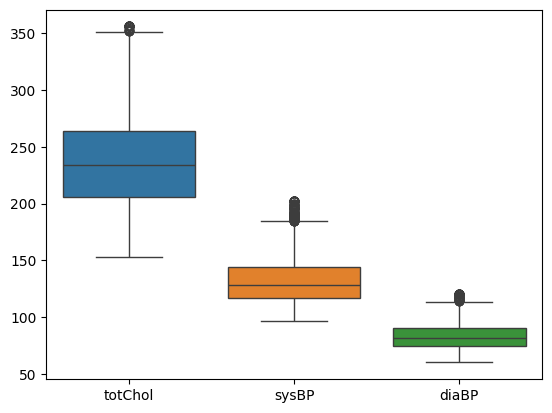

In [ ]:
sns.boxplot(data=df_clean.loc[:, ['totChol', 'sysBP', 'diaBP']])

<Axes: >

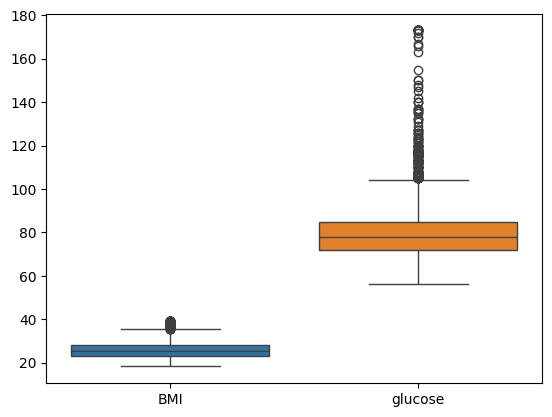

In [ ]:
sns.boxplot(data=df_clean.loc[:, [ 'BMI', 'glucose']])

<Axes: >

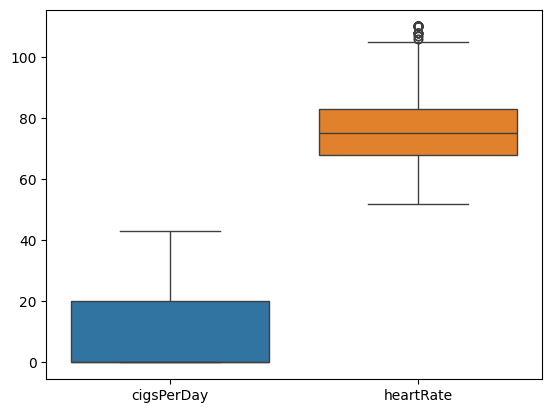

In [ ]:
sns.boxplot(data=df_clean.loc[:, [ 'cigsPerDay', 'heartRate']])

All boxplots indicate that the adjustment for the outliers was successful, and all values ​​are within the interquartile range or correspond to real medical indicators. Thus, the sample size remained the same.

Checking for multicollinearity.

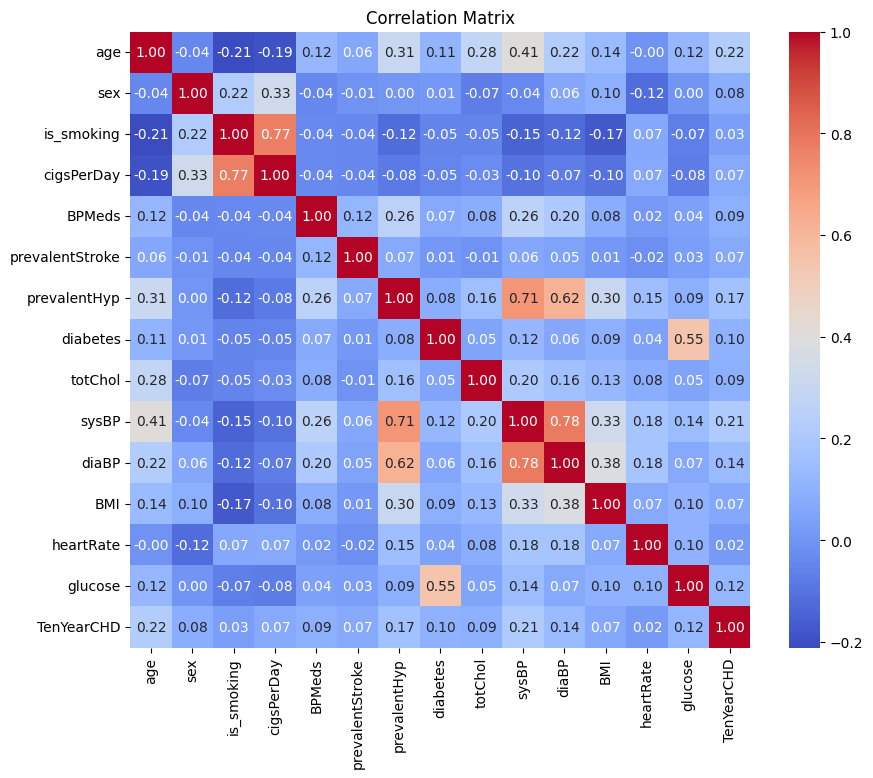

In [ ]:
# Calculating and displaying the correlation matrix
correlation_matrix = df_clean.corr()

# Building a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix showed the presence of several features that correlate with each other:
1. PrevalentHyp with systolic and diastolic pressure.
2. Diabetes and glucose.
3. Smoking and the number of cigarettes per day.

It was decided to remove some of these factors:

1. The categorical variable diabetes is not balanced and does not quite correspond to the picture in the population. In addition, such a variable distorts the results.

2. The number of cigarettes per day. The "is_smoking" variable is more convenient for analysis, since it can be used as a factor.

In [ ]:
df_clean = df_clean.drop(columns=['cigsPerDay', 'diabetes'])

It was also decided to remove the variable regarding the presence of a stroke in the anamnesis. The values ​​of this variable are very unbalanced and can distort the results.

In [ ]:
df_clean = df_clean.drop(columns=['prevalentStroke'])

**2.** **Modeling**

In [ ]:
# Defining predictors and target variable
X = df_clean.drop([target_col], axis=1)
y = df_clean[target_col]

print("Distribution of the target variable:")
print(y.value_counts(normalize=True))
print()

# Split into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("Distribution in the training sample:")
print(y_train.value_counts(normalize=True))
print()
print("\nDistribution in the test sample:")
print(y_test.value_counts(normalize=True))
print()

print(f"\nTraining sample size: {X_train.shape}")
print(f"Test sample size: {X_test.shape}")


Distribution of the target variable:
TenYearCHD
0    0.849263
1    0.150737
Name: proportion, dtype: float64

Distribution in the training sample:
TenYearCHD
0    0.849189
1    0.150811
Name: proportion, dtype: float64


Distribution in the test sample:
TenYearCHD
0    0.849558
1    0.150442
Name: proportion, dtype: float64


Training sample size: (2712, 11)
Test sample size: (678, 11)


**Class Imbalance Assessment.**

**Severe Class Imbalance Detected:**
* Majority class (0): ~85% of cases (no CHD in 10 years)
* Minority class (1): ~15% of cases (CHD in 10 years)
* Imbalance ratio: About 5.6:1

**Stratification Quality:**
* The train-test split maintains nearly identical proportions:
   * Training: 84.92% vs 15.08%.
   * Test: 84.96% vs 15.04%.
   * Difference: < 0.1%.

**Sample Size Evaluation:**
* Training: 2,712 samples with ~410 positive cases (15.08%).
* Test: 678 samples with ~102 positive cases (15.04%).
* Adequate size for logistic regression, but the minority class is concerning.

Handling the imbalance by using class weights to penalize misclassification of minority class more heavily.




In [ ]:
# Standardization of numerical variables
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Standardize only numeric columns
numeric_features = ['age', 'totChol', 'BMI', 'sysBP', 'diaBP', 'heartRate', 'glucose']
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

# Building a model
logistic_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)  # This automatically handles imbalance
logistic_model.fit(X_train_scaled, y_train)


# Predictions model
y_pred = logistic_model.predict(X_test_scaled) # Predicted classes (0 or 1)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1] # Class 1 Probabilities

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

Cross-validation scores: [0.65930018 0.68692449 0.64575646 0.66420664 0.65867159]
Mean CV score: 0.663 (+/- 0.027)


**Model Performance:**
* The mean CV score of 0.663 suggests moderate predictive performance.

**Consistency:**
* The relatively small standard deviation (±0.027) indicates the model performs consistently across different data splits.
* The scores range from 0.646 to 0.687, which is a fairly tight range of about 4 percentage points.

**Reliability:**
* The consistent performance across 5 folds suggests the model is stable and not overly sensitive to particular data partitions.
* This is a positive sign for model reliability.

**Areas for consideration:**
* The scores show there's room for improvement.
* All folds perform similarly, suggesting no major data distribution issues.
* The model appears to have found a stable learning pattern rather than overfitting to specific subsets.


MODEL QUALITY METRICS
Accuracy :     0.696
Precision :    0.280
Recall :       0.647
F1-Score:      0.391



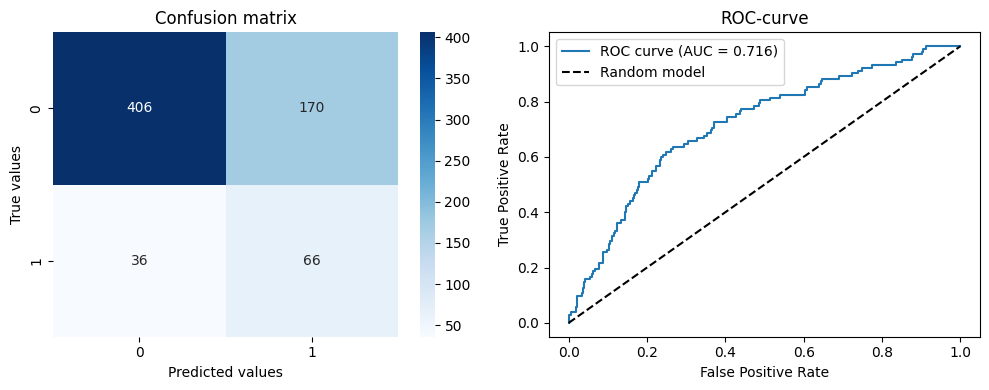


CONFUSION MATRIX:
--------------------
True Negative (TN):  406
False Positive (FP): 170
False Negative (FN): 36
True Positive (TP):  66

DETAILED REPORT:
--------------------
              precision    recall  f1-score   support

     Class 0       0.92      0.70      0.80       576
     Class 1       0.28      0.65      0.39       102

    accuracy                           0.70       678
   macro avg       0.60      0.68      0.59       678
weighted avg       0.82      0.70      0.74       678


INTERPRETATION:
--------------------
• Out of 100 cases, the model correctly classifies 69.6
• Of those for whom the model predicted a positive outcome, 28.0% really positive
• Of all the positive cases, the model found 64.7%


In [ ]:
# 1. Calculating the main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("MODEL QUALITY METRICS")
print("=" * 40)
print(f"Accuracy :     {accuracy:.3f}")
print(f"Precision :    {precision:.3f}")
print(f"Recall :       {recall:.3f}")
print(f"F1-Score:      {f1:.3f}")
print()

# 2. Confusion matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True values')
plt.xlabel('Predicted values')


from sklearn.metrics import roc_auc_score, roc_curve
# ROC-curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()

plt.tight_layout()
plt.show()

print("\nCONFUSION MATRIX:")
print("-" * 20)
print(f"True Negative (TN):  {cm[0,0]}")
print(f"False Positive (FP): {cm[0,1]}")
print(f"False Negative (FN): {cm[1,0]}")
print(f"True Positive (TP):  {cm[1,1]}")

# 3. Detailed report
print("\nDETAILED REPORT:")
print("-" * 20)
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

# 4. Interpretation of results
print("\nINTERPRETATION:")
print("-" * 20)
print(f"• Out of 100 cases, the model correctly classifies {accuracy*100:.1f}")
print(f"• Of those for whom the model predicted a positive outcome, {precision*100:.1f}% really positive")
print(f"• Of all the positive cases, the model found {recall*100:.1f}%")


Calculating the optimal threshold.

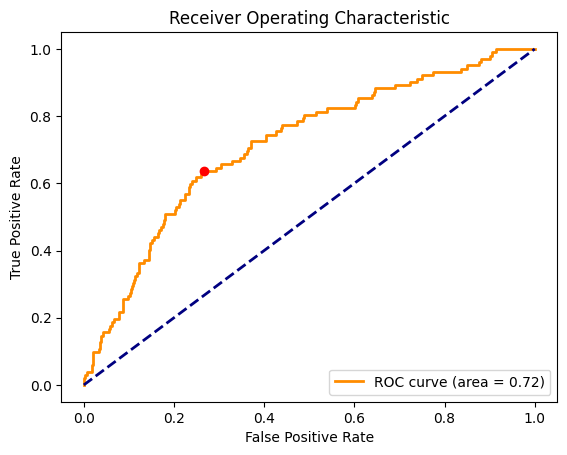

The optimal threshold: 0.51
Recall models at optimal threshold: 0.97
Accuracy models at optimal threshold: 0.25
Precision models at optimal threshold: 0.16
F1-Score models at optimal threshold: 0.28


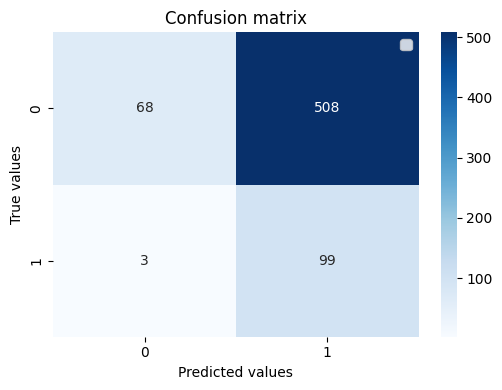


CONFUSION MATRIX:
--------------------
True Negative (TN):  68
False Positive (FP): 508
False Negative (FN): 3
True Positive (TP):  99

DETAILED REPORT:
--------------------
              precision    recall  f1-score   support

     Class 0       0.96      0.12      0.21       576
     Class 1       0.16      0.97      0.28       102

    accuracy                           0.25       678
   macro avg       0.56      0.54      0.24       678
weighted avg       0.84      0.25      0.22       678



In [ ]:
# ROC-curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating of AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Surch of the optimal threshold: maximizing the gap between TPR and FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Visualize the ROC-curve with optimal threshold
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', zorder=5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"The optimal threshold: {optimal_threshold:.2f}")

# Threshold applying
y_pred_optimal = (y_pred_proba >= 0.2).astype(int)
print(f"Recall models at optimal threshold: {recall_score(y_test, y_pred_optimal):.2f}")
print(f"Accuracy models at optimal threshold: {accuracy_score(y_test, y_pred_optimal):.2f}")
print(f"Precision models at optimal threshold: {precision_score(y_test, y_pred_optimal):.2f}")
print(f"F1-Score models at optimal threshold: {f1_score(y_test, y_pred_optimal):.2f}")

# 2. Confusion matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.legend()

plt.tight_layout()
plt.show()

print("\nCONFUSION MATRIX:")
print("-" * 20)
print(f"True Negative (TN):  {cm[0,0]}")
print(f"False Positive (FP): {cm[0,1]}")
print(f"False Negative (FN): {cm[1,0]}")
print(f"True Positive (TP):  {cm[1,1]}")

# 3. Detailed report
print("\nDETAILED REPORT:")
print("-" * 20)
print(classification_report(y_test, y_pred_optimal, target_names=['Class 0', 'Class 1']))


**Conclusions:**

**1. Class Imbalance Problem:**
* This is still an imbalanced dataset with Class 0 (576 samples) heavily outnumbering Class 1 (102 samples) by about 5.6:1.

**2. Model Bias Toward Majority Class:**
* Class 0 has excellent precision (0.92) but moderate recall (0.70).
* Class 1 has very poor precision (0.28) but decent recall (0.65).
* The model is conservative about predicting Class 1, leading to many false positives when it does.

**3. Misleading Accuracy:**
* The 69.6% accuracy is inflated by the class imbalance.
* The model could achieve ~85% accuracy by simply predicting Class 0 for everything, so 69.6% suggests it's actually underperforming.

**4. Poor Minority Class Performance:**
* The F1-score for Class 1 (0.39) indicates the model struggles significantly with the minority class.
* High recall (0.65) means it catches most Class 1 cases, but terrible precision (0.28) means it generates many false alarms.

**5. Key Issues:**
* 170 false positives suggest the model is too eager to predict Class 1 in some contexts.
* The model finds some signal for Class 1 (decent recall) but can't distinguish it cleanly (poor precision).


In [ ]:
# Getting important information from the model
feature_names = X_train_scaled.columns  # Names of factors
coefficients = logistic_model.coef_[0]  # Model coefficients

# Create a results table
results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add a explanation of the impact
results['Influence'] = results['Coefficient'].apply(
    lambda x: 'Increases the likelihood' if x > 0 else 'Reduces the likelihood'
)

# Sort by importance (by absolute value of the coefficient)
results['Importance'] = abs(results['Coefficient'])
results = results.sort_values('Importance', ascending=False)

# We show only important features
print("The influence of features on the result:")
print("-" * 40)

for i, row in results.iterrows():
    if abs(row['Coefficient']) > 0.1:  # Only significant coefficients
        print(f"{row['Feature']}: {row['Coefficient']:.3f} - {row['Influence']}")

The influence of features on the result:
----------------------------------------
is_smoking: 0.579 - Increases the likelihood
sex: 0.519 - Increases the likelihood
age: 0.487 - Increases the likelihood
sysBP: 0.333 - Increases the likelihood
prevalentHyp: 0.205 - Increases the likelihood
glucose: 0.140 - Increases the likelihood
totChol: 0.132 - Increases the likelihood


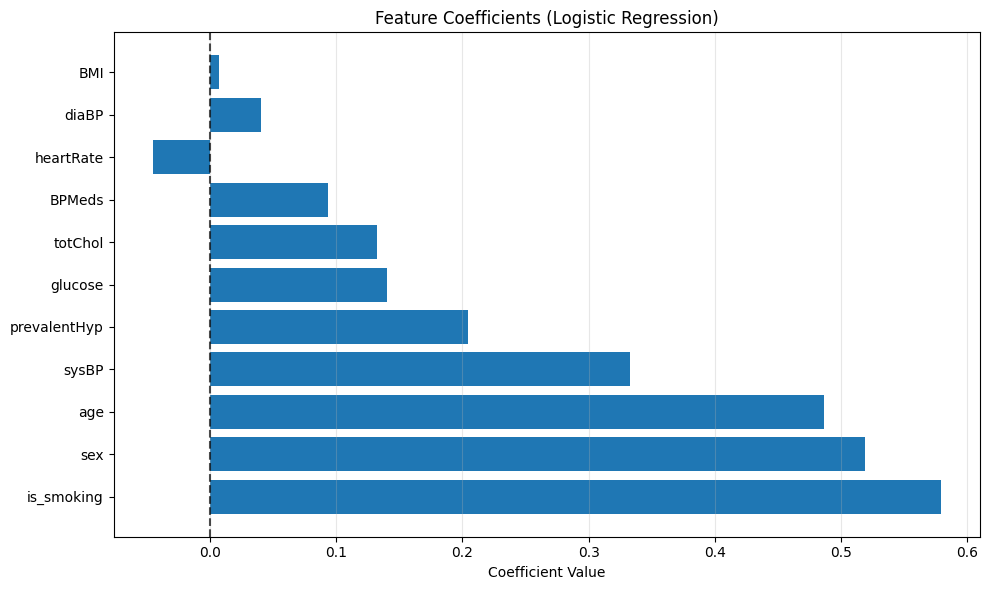

In [ ]:
# Visualization of the importance of factors
plt.figure(figsize=(10, 6))
plt.barh(results['Feature'], results['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients (Logistic Regression)')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Feature Importance Interpretation**
- **is_smoking (0.579)**:
  - **Influence**: Increases the likelihood.
  - **Interpretation**: Smoking has the highest influence among the listed features. An increase in this feature (being a smoker) significantly increases the likelihood of developing CHD, highlighting smoking as a major risk factor.

- **sex (0.519)**:
  - **Influence**: Increases the likelihood.
  - **Interpretation**: The male sex is associated with a higher likelihood of CHD. This coefficient suggests a significant influence, indicating gender-related differences in CHD risk.

- **age (0.487)**:
  - **Influence**: Increases the likelihood.
  - **Interpretation**: Age is a well-established risk factor for CHD, with older age contributing to increased risk.

- **sysBP (0.333)**:
  - **Influence**: Increases the likelihood.
  - **Interpretation**: Systolic blood pressure is another important risk factor. Higher systolic BP readings are associated with increased CHD risk.

- **prevalentHyp (0.205)**:
  - **Influence**: Increases the likelihood.
  - **Interpretation**: The presence of hypertension is associated with a moderately increased risk of developing CHD.

- **glucose (0.140)**:
  - **Influence**: Increases the likelihood.
  - **Interpretation**: Elevated glucose levels, which may indicate diabetes or prediabetes, slightly increase the risk of CHD.

- **totChol (0.132)**:
  - **Influence**: Increases the likelihood.
  - **Interpretation**: Higher total cholesterol levels also contribute to an increased risk of CHD, although the influence is relatively small compared to other factors listed.

**General Conclusion:**

**1.** **Class Weighting Limitations.** The results show that class weighting alone isn't sufficient for this dataset. The method successfully boosted recall for Class 1 (0.65), but at the cost of precision (0.28).

**2.** **Feature Quality Issues.** The poor precision despite class weighting suggests the features may not contain enough discriminative information to cleanly separate the classes. The model is picking up on some signal (hence decent recall) but also capturing a lot of noise.

**3.** **Deeper Data Problems:**
* Inherent class overlap in the feature space.
* Noisy labels in the training data.
* Missing important features that would help distinguish the classes.
* The minority class may actually represent multiple distinct sub-patterns.

**4.** **Potential Problems:**
- Low accuracy due to imbalanced sample.
In your situation of an imbalanced sample the model achieved high stability but low overall accuracy, neglecting smaller classes.
- The model is mistrained (due to an imbalanced sample). The model is trained to predict only the dominant class (Clacc 0, No risk of CHD), ignoring the less represented ones(Class 1, Risk of CHD).

**Recommendations.**

Applying Resampling Techniques for handling imbalanced data:
  - Undersampling: Reducing the sample size of the dominant class to even out the distribution.
  - Oversampling: Increasing the sample size of the minor class, e.g. by resampling the data.
  - SMOTE (Synthetic Minority Over-sampling Technique): Creating synthetic samples of the minor class.